```text
=================================================

GRADED CHALLENGE 5

Nama  : Ahmad Naufal Budianto
Batch : RMT-31

=================================================
```

# Introduction

Program ini dibuat untuk memprediksi `default_payment_next_month` dengan metode klasifikasi menggunakan tiga tipe pemodelan (Logistic Regression, SVM, dan KNN). Dataset yang saya pergunakan merupakan data dari bigquery `bigquery-public-data.ml_datasets.credit_card_default`. Dalam pengolahan data saya melakukan EDA, Feature Engineering, Pipeline Model (pelatihan dan evaluasi), Model Saving, dan Model Inference; yang kemudian akan saya lakukan deployment menggunakan `streamlit`.

# Query SQL

Pada tahap awal saya menggunakan Google Cloud environment (Google Collab) untuk mengambil data bigquery, dengan hanya mengambil kolom-kolom `limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month`.

In [ ]:
from google.colab import auth
from google.cloud import bigquery
from google.colab import files

auth.authenticate_user()
print('Authenticated')

project_id = "hacktiv-421408"
client = bigquery.Client(project=project_id)

Authenticated


In [ ]:
df = client.query('''
SELECT
    limit_balance,
    CAST(sex AS INT64) AS sex,
    CAST(education_level AS INT64) AS education_level,
    CAST(marital_status AS INT64) AS marital_status,
    age,
    pay_0,
    pay_2,
    pay_3,
    pay_4,
    CAST(pay_5 AS FLOAT64) AS pay_5,
    CAST(pay_6 AS FLOAT64) AS pay_6,
    bill_amt_1,
    bill_amt_2,
    bill_amt_3,
    bill_amt_4,
    bill_amt_5,
    bill_amt_6,
    pay_amt_1,
    pay_amt_2,
    pay_amt_3,
    pay_amt_4,
    pay_amt_5,
    pay_amt_6,
    CAST(default_payment_next_month AS INT64) AS default_payment_next_month
FROM
    `bigquery-public-data.ml_datasets.credit_card_default`
LIMIT 61876;
''').to_dataframe()

Kemudian mengubah tipe data pada kolom-kolom `sex`, `education_level`, `marital_status`, `pay_5`, `pay_6`, dan `default_payment_next_month` menjadi tipe data numerik lalu menyimpan query ke dalam dataframe `df` dan diunduh menjadi csv `P1G5_Set_1_naufal.csv`.

In [ ]:
df.to_csv('P1G5_Set_1_naufal.csv', index=False)
files.download('P1G5_Set_1_naufal.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Menampilkan 10 baris awal dataset.
df.head(10)

limit_balance  sex  education_level  marital_status   age  pay_0  pay_2  \
0        80000.0    1                6               1  54.0    0.0    0.0   
1       200000.0    1                4               1  49.0    0.0    0.0   
2        20000.0    2                6               2  22.0    0.0    0.0   
3       260000.0    2                4               2  33.0    0.0    0.0   
4       150000.0    1                4               2  32.0    0.0    0.0   
5       300000.0    2                4               2  32.0    0.0    0.0   
6       130000.0    1                1               1  45.0    0.0    0.0   
7       200000.0    1                1               1  58.0    0.0    0.0   
8       500000.0    1                1               1  39.0    0.0    0.0   
9       230000.0    1                1               1  48.0    0.0    0.0   

   pay_3  pay_4  pay_5  ...  bill_amt_4  bill_amt_5  bill_amt_6  pay_amt_1  \
0    0.0    0.0    0.0  ...     29296.0     26210.0     17643.0     2545.0   
1    0.0    0.0    0.0  ...     50146.0     50235.0     48984.0     1689.0   
2    0.0    0.0    0.0  ...      1434.0       500.0         0.0     4641.0   
3    0.0    0.0    0.0  ...     27821.0     30767.0     29890.0     5000.0   
4    0.0   -1.0    0.0  ...    150464.0    143375.0    146411.0     4019.0   
5    0.0    0.0    0.0  ...     65150.0      -450.0       700.0    15235.0   
6    0.0    0.0    0.0  ...     62377.0     63832.0     65099.0     2886.0   
7    0.0    0.0    0.0  ...    124647.0    126921.0    129167.0     7822.0   
8    0.0    0.0    0.0  ...    174500.0    137406.0    204975.0    54209.0   
9    0.0    0.0    0.0  ...    105508.0    108101.0    110094.0     7000.0   

   pay_amt_2  pay_amt_3  pay_amt_4  pay_amt_5  pay_amt_6  \
0     2208.0     1336.0     2232.0      542.0      348.0   
1     2164.0     2500.0     3480.0     2500.0     3000.0   
2     1019.0      900.0        0.0     1500.0        0.0   
3     5000.0     1137.0     5000.0     1085.0     5000.0   
4   146896.0   157436.0     4600.0     4709.0     5600.0   
5     1491.0     1303.0        0.0     2000.0     1400.0   
6     2908.0     2129.0     2354.0     2366.0     2291.0   
7     4417.0     4446.0     4597.0     4677.0     4698.0   
8     4607.0     4603.0     5224.0   207440.0     7509.0   
9     6607.0     3773.0     4290.0     4164.0     2000.0   

   default_payment_next_month  
0                           1  
1                           0  
2                           1  
3                           0  
4                           0  
5                           0  
6                           0  
7                           0  
8                           0  
9                           0  

[10 rows x 24 columns]

In [ ]:
# Menampilkan 10 baris akhir dataset.
df.tail(10)

limit_balance  sex  education_level  marital_status   age  pay_0  pay_2  \
2955       360000.0    2                2               2  26.0   -1.0   -1.0   
2956       100000.0    1                3               1  40.0    0.0    0.0   
2957        30000.0    2                3               1  48.0    1.0   -1.0   
2958        80000.0    2                3               1  39.0   -1.0   -1.0   
2959        20000.0    1                3               2  26.0   -1.0   -1.0   
2960        80000.0    2                3               2  28.0   -1.0   -1.0   
2961        50000.0    2                3               1  51.0   -1.0   -1.0   
2962       450000.0    2                2               1  38.0   -2.0   -2.0   
2963        50000.0    2                2               1  44.0   -2.0   -2.0   
2964       290000.0    2                2               1  39.0    1.0   -2.0   

      pay_3  pay_4  pay_5  ...  bill_amt_4  bill_amt_5  bill_amt_6  pay_amt_1  \
2955   -1.0   -1.0   -2.0  ...         0.0         0.0         0.0      463.0   
2956   -1.0   -1.0   -2.0  ...         0.0         0.0         0.0     2000.0   
2957   -1.0   -2.0   -2.0  ...         0.0         0.0         0.0      200.0   
2958   -1.0   -1.0   -2.0  ...         0.0         0.0      5000.0     5000.0   
2959   -1.0   -2.0   -2.0  ...         0.0         0.0         0.0     1560.0   
2960   -1.0   -2.0   -2.0  ...         0.0         0.0         0.0     2800.0   
2961   -1.0   -1.0   -2.0  ...         0.0         0.0         0.0      300.0   
2962   -2.0   -2.0   -2.0  ...       390.0       390.0       390.0      390.0   
2963   -2.0   -2.0   -2.0  ...       390.0       390.0         0.0      390.0   
2964   -2.0   -2.0   -2.0  ...      3184.0       390.0       390.0    10000.0   

      pay_amt_2  pay_amt_3  pay_amt_4  pay_amt_5  pay_amt_6  \
2955     2500.0        0.0        0.0        0.0        0.0   
2956     2377.0    40000.0        0.0        0.0        0.0   
2957        0.0        0.0        0.0        0.0        0.0   
2958     5000.0        0.0     5000.0     5000.0      470.0   
2959        0.0        0.0        0.0        0.0        0.0   
2960        0.0        0.0        0.0        0.0        0.0   
2961     5880.0        0.0        0.0        0.0        0.0   
2962      780.0      390.0      390.0      390.0      390.0   
2963      390.0      390.0      390.0        0.0      780.0   
2964      800.0     3184.0      390.0      390.0     6617.0   

      default_payment_next_month  
2955                           0  
2956                           0  
2957                           0  
2958                           0  
2959                           0  
2960                           0  
2961                           1  
2962                           1  
2963                           0  
2964                           0  

[10 rows x 24 columns]

# Import Libraries

Melakukan *import* modul-modul yang akan saya gunakan dalam program pemodelan klasifikasi.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Library untuk melakukan split data.
from sklearn.model_selection import train_test_split

# Library untuk penanganan outliers.
from feature_engine.outliers import Winsorizer

# Libraries untuk melakukan pipeline pada normalisasi dan pemodelan.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Library untuk melakukan mencari model yang terbaik menggunakan metode grid search.
from sklearn.model_selection import GridSearchCV, cross_val_score

# Library untuk menampilkan hasil pemodelan terbaik.
from sklearn.metrics import classification_report

# Library untuk model saving.
import pickle

# Data Loading

Pada tahap ini saya melakukan *loading* data dari csv yang sudah tersimpan, dan menjalankan program di VSCode.

In [2]:
# Melakukan perintah untuk menampilkan semua kolom dari dataset.
pd.set_option('display.max_columns', 500)

# Melakukan data loading dari csv dataset yang akan digunakan.
df = pd.read_csv("/Users/Naufal's/Desktop/Hacktiv8 Tugas/p1-ftds031-rmt-g5-naufalbudianto28/P1G5_Set_1_naufal.csv")

df

limit_balance  sex  education_level  marital_status   age  pay_0  pay_2  \
0           80000.0    1                6               1  54.0    0.0    0.0   
1          200000.0    1                4               1  49.0    0.0    0.0   
2           20000.0    2                6               2  22.0    0.0    0.0   
3          260000.0    2                4               2  33.0    0.0    0.0   
4          150000.0    1                4               2  32.0    0.0    0.0   
...             ...  ...              ...             ...   ...    ...    ...   
2960        80000.0    2                3               2  28.0   -1.0   -1.0   
2961        50000.0    2                3               1  51.0   -1.0   -1.0   
2962       450000.0    2                2               1  38.0   -2.0   -2.0   
2963        50000.0    2                2               1  44.0   -2.0   -2.0   
2964       290000.0    2                2               1  39.0    1.0   -2.0   

      pay_3  pay_4  pay_5  pay_6  bill_amt_1  bill_amt_2  bill_amt_3  \
0       0.0    0.0    0.0    0.0     61454.0     61808.0     62290.0   
1       0.0    0.0    0.0    0.0     49221.0     49599.0     50942.0   
2       0.0    0.0    0.0    0.0     19568.0     19420.0     15535.0   
3       0.0    0.0    0.0    0.0     18457.0     22815.0     27086.0   
4       0.0   -1.0    0.0    0.0    159919.0     68686.0    161192.0   
...     ...    ...    ...    ...         ...         ...         ...   
2960   -1.0   -2.0   -2.0   -2.0      4280.0      2800.0         0.0   
2961   -1.0   -1.0   -2.0   -2.0       752.0       300.0      5880.0   
2962   -2.0   -2.0   -2.0   -2.0       390.0       390.0       390.0   
2963   -2.0   -2.0   -2.0   -2.0      1473.0       390.0       390.0   
2964   -2.0   -2.0   -2.0   -2.0       -70.0      9540.0       390.0   

      bill_amt_4  bill_amt_5  bill_amt_6  pay_amt_1  pay_amt_2  pay_amt_3  \
0        29296.0     26210.0     17643.0     2545.0     2208.0     1336.0   
1        50146.0     50235.0     48984.0     1689.0     2164.0     2500.0   
2         1434.0       500.0         0.0     4641.0     1019.0      900.0   
3        27821.0     30767.0     29890.0     5000.0     5000.0     1137.0   
4       150464.0    143375.0    146411.0     4019.0   146896.0   157436.0   
...          ...         ...         ...        ...        ...        ...   
2960         0.0         0.0         0.0     2800.0        0.0        0.0   
2961         0.0         0.0         0.0      300.0     5880.0        0.0   
2962       390.0       390.0       390.0      390.0      780.0      390.0   
2963       390.0       390.0         0.0      390.0      390.0      390.0   
2964      3184.0       390.0       390.0    10000.0      800.0     3184.0   

      pay_amt_4  pay_amt_5  pay_amt_6  default_payment_next_month  
0        2232.0      542.0      348.0                           1  
1        3480.0     2500.0     3000.0                           0  
2           0.0     1500.0        0.0                           1  
3        5000.0     1085.0     5000.0                           0  
4        4600.0     4709.0     5600.0                           0  
...         ...        ...        ...                         ...  
2960        0.0        0.0        0.0                           0  
2961        0.0        0.0        0.0                           1  
2962      390.0      390.0      390.0                           1  
2963      390.0        0.0      780.0                           0  
2964      390.0      390.0     6617.0                           0  

[2965 rows x 24 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

In [4]:
df.describe()

limit_balance          sex  education_level  marital_status  \
count    2965.000000  2965.000000      2965.000000     2965.000000   
mean   163369.308600     1.607757         1.849578        1.559865   
std    125030.415472     0.488333         0.778184        0.522317   
min     10000.000000     1.000000         0.000000        0.000000   
25%     50000.000000     1.000000         1.000000        1.000000   
50%    140000.000000     2.000000         2.000000        2.000000   
75%    230000.000000     2.000000         2.000000        2.000000   
max    800000.000000     2.000000         6.000000        3.000000   

               age        pay_0        pay_2        pay_3        pay_4  \
count  2965.000000  2965.000000  2965.000000  2965.000000  2965.000000   
mean     35.193255     0.005059    -0.122428    -0.141653    -0.185160   
std       9.109439     1.114395     1.180784     1.183630     1.178322   
min      21.000000    -2.000000    -2.000000    -2.000000    -2.000000   
25%      28.000000    -1.000000    -1.000000    -1.000000    -1.000000   
50%      34.000000     0.000000     0.000000     0.000000     0.000000   
75%      41.000000     0.000000     0.000000     0.000000     0.000000   
max      69.000000     8.000000     7.000000     7.000000     8.000000   

             pay_5        pay_6     bill_amt_1     bill_amt_2     bill_amt_3  \
count  2965.000000  2965.000000    2965.000000    2965.000000    2965.000000   
mean     -0.225295    -0.254637   52118.305228   50649.153120   48239.757504   
std       1.159003     1.167305   72328.670541   70785.001588   68145.710745   
min      -2.000000    -2.000000  -11545.000000  -67526.000000  -25443.000000   
25%      -1.000000    -1.000000    3958.000000    3390.000000    3302.000000   
50%       0.000000     0.000000   24257.000000   23111.000000   21520.000000   
75%       0.000000     0.000000   69852.000000   67827.000000   63023.000000   
max       7.000000     7.000000  613860.000000  512650.000000  578971.000000   

          bill_amt_4     bill_amt_5     bill_amt_6      pay_amt_1  \
count    2965.000000    2965.000000    2965.000000    2965.000000   
mean    44089.683305   40956.080607   39773.072513    6348.902867   
std     61907.454056   58271.904751   57303.488981   20885.735336   
min    -46627.000000  -46627.000000  -73895.000000       0.000000   
25%      2582.000000    1958.000000    1430.000000    1013.000000   
50%     19894.000000   18814.000000   18508.000000    2234.000000   
75%     58622.000000   53373.000000   52287.000000    5087.000000   
max    488808.000000  441981.000000  436172.000000  493358.000000   

          pay_amt_2      pay_amt_3      pay_amt_4      pay_amt_5  \
count  2.965000e+03    2965.000000    2965.000000    2965.000000   
mean   6.272494e+03    5150.497133    4561.376054    4913.286678   
std    2.887967e+04   14287.079982   13281.499599   16734.340778   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    9.900000e+02     477.000000     313.000000     323.000000   
50%    2.175000e+03    1994.000000    1600.000000    1646.000000   
75%    5.000000e+03    4500.000000    4000.000000    4021.000000   
max    1.227082e+06  199209.000000  202076.000000  388071.000000   

           pay_amt_6  default_payment_next_month  
count    2965.000000                 2965.000000  
mean     5382.701518                    0.214165  
std     17275.953029                    0.410311  
min         0.000000                    0.000000  
25%       173.000000                    0.000000  
50%      1615.000000                    0.000000  
75%      4081.000000                    0.000000  
max    403500.000000                    1.000000

Data telah berhasil ter-*loading* dan kemudian saya melakukan cek duplikasi data.

In [5]:
print("Jumlah data terduplikasi: ", df.duplicated().sum())
print(df[df.duplicated()])

Jumlah data terduplikasi:  1
      limit_balance  sex  education_level  marital_status   age  pay_0  pay_2  \
2815       200000.0    2                1               1  34.0    1.0   -2.0   

      pay_3  pay_4  pay_5  pay_6  bill_amt_1  bill_amt_2  bill_amt_3  \
2815   -2.0   -2.0   -2.0   -2.0         0.0         0.0         0.0   

      bill_amt_4  bill_amt_5  bill_amt_6  pay_amt_1  pay_amt_2  pay_amt_3  \
2815         0.0         0.0         0.0        0.0        0.0        0.0   

      pay_amt_4  pay_amt_5  pay_amt_6  default_payment_next_month  
2815        0.0        0.0        0.0                           0  


In [6]:
df = df.drop_duplicates()
print("Jumlah data terduplikasi: ", df.duplicated().sum())

Jumlah data terduplikasi:  0


Data yang terduplikasi sudah berhasil dihapus.

# EDA

Pada tahap ini saya akan melakukan eksplorasi data menggunakan visualisasi sederhana dan sebagainya.

### Sex Distribution

Melihat distribusi `sex` pada dataset dengan visualisasi *pie chart*.

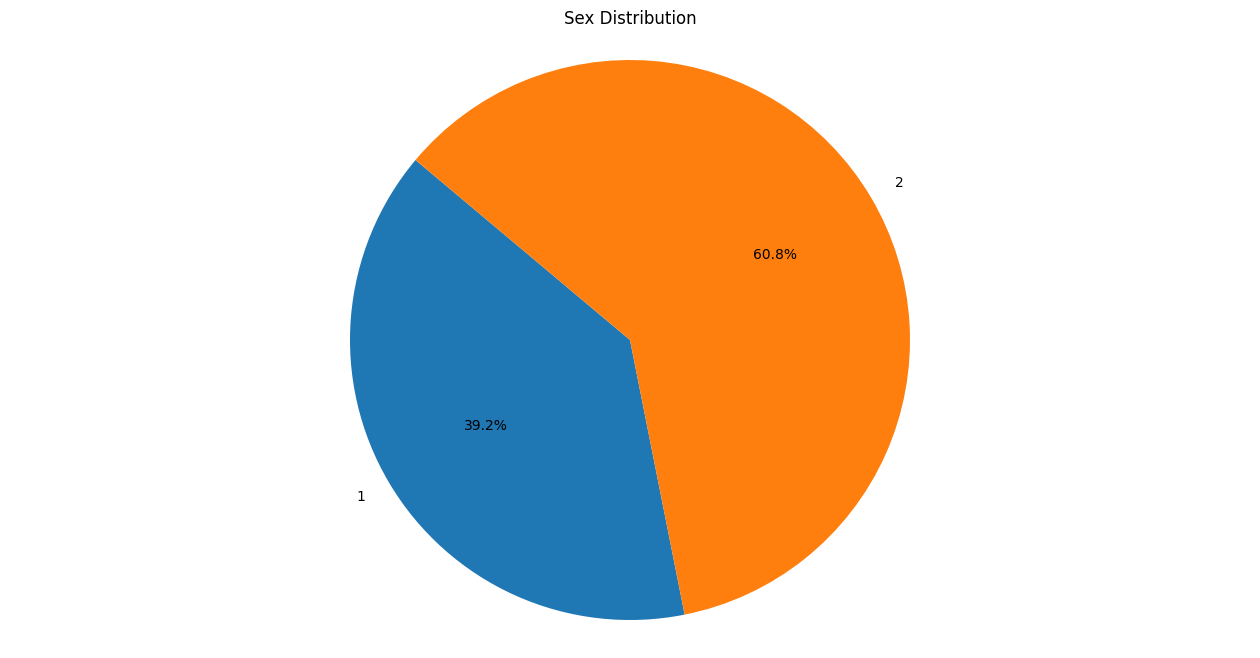

In [7]:
# Melakukan perintah untuk membuat dua plot.
plt.figure(figsize=(16, 8))

# Membuat grafik pie chart untuk jenis kelamin pada dataset.
sex_pie = df.groupby('sex').size()

# Plotting the pie chart
plt.pie(sex_pie, labels=sex_pie.index, autopct='%1.1f%%', startangle=140)
plt.title('Sex Distribution')
plt.axis('equal')

plt.show()

Penjelasan angka `1` pada dataset adalah **Laki-laki** dan `2` adalah **Perempuan**. Sehingga hasil dari data visualisasi di atas menunjukkan bahwa pada dataset ini jumlah Perempuan (61%) lebih banyak daripada Laki-laki (39%).

### Age Distribution

Melihat visualiasi *bar chart* terhadap distribusi `umur` pada dataset.

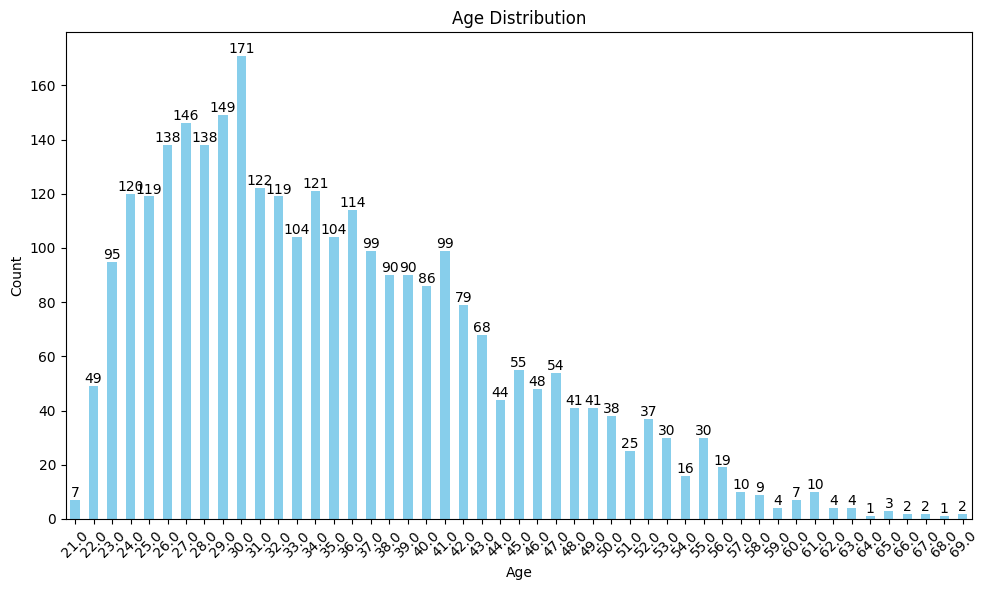

In [8]:
plt.figure(figsize=(10, 6))

# Membuat bar chart untuk distribusi umur pada dataset.
age_bar = df['age'].value_counts().sort_index().plot(kind='bar', color='skyblue')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Menampilkan nilai tiap bar.
for p in age_bar.patches:
    age_bar.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

Terlihat dari hasil visualisasi data, umur pada dataset memiliki variasi yang beragam dengan umur paling muda yaitu `21 tahun `dan umur paling senior yaitu `69 tahun`.

### Limit Balance Distribution

Melihat distribusi pada kolom `limit_balance` yang merupakan jumlah limit dari credit pengguna dengan menggunakan histogram.

Nilai minimal:  10000.0


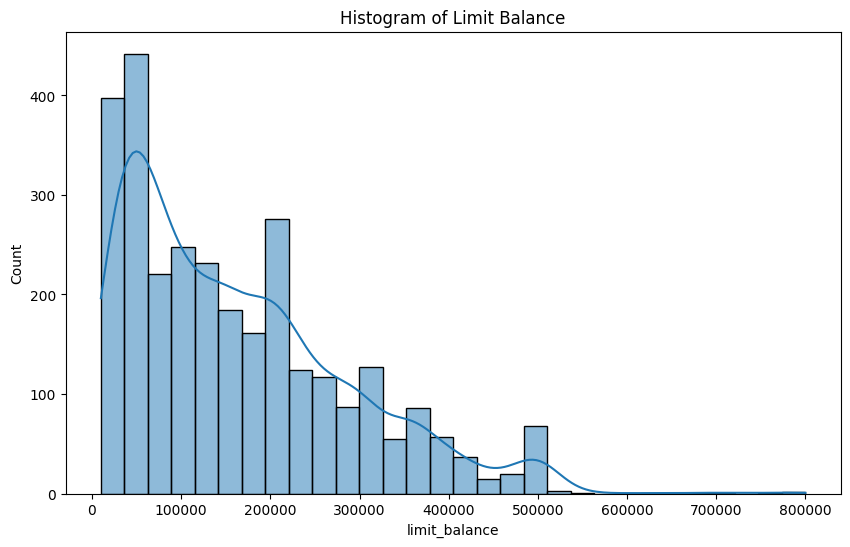

In [9]:
plt.figure(figsize=(10, 6))

sns.histplot(df['limit_balance'], kde=True, bins=30)
plt.title('Histogram of Limit Balance')

print('Nilai minimal: ', df['limit_balance'].min())

Sekilas terlihat dari hasil visualisasi data, kolom `limit_balance` memiliki distribusi `positively skewed` dan memiliki rentang variasi data yang cukup luas ($10,000 hingga $800,000 ).

### Basic Data Correlation

Pada kolom-kolom informasi dasar pengguna, saya akan mencoba untuk melakukan analisa korelasi Spearman terhadap kolom klasifikasi `default_payment_next_month`.

Meskipun pada kolom `sex`, `education_level`, dan `marital_status` saya anggap adalah **hasil dari encoding**, akan tetapi karena sudah berbentuk numerik saya tetap menggunakan Spearman.

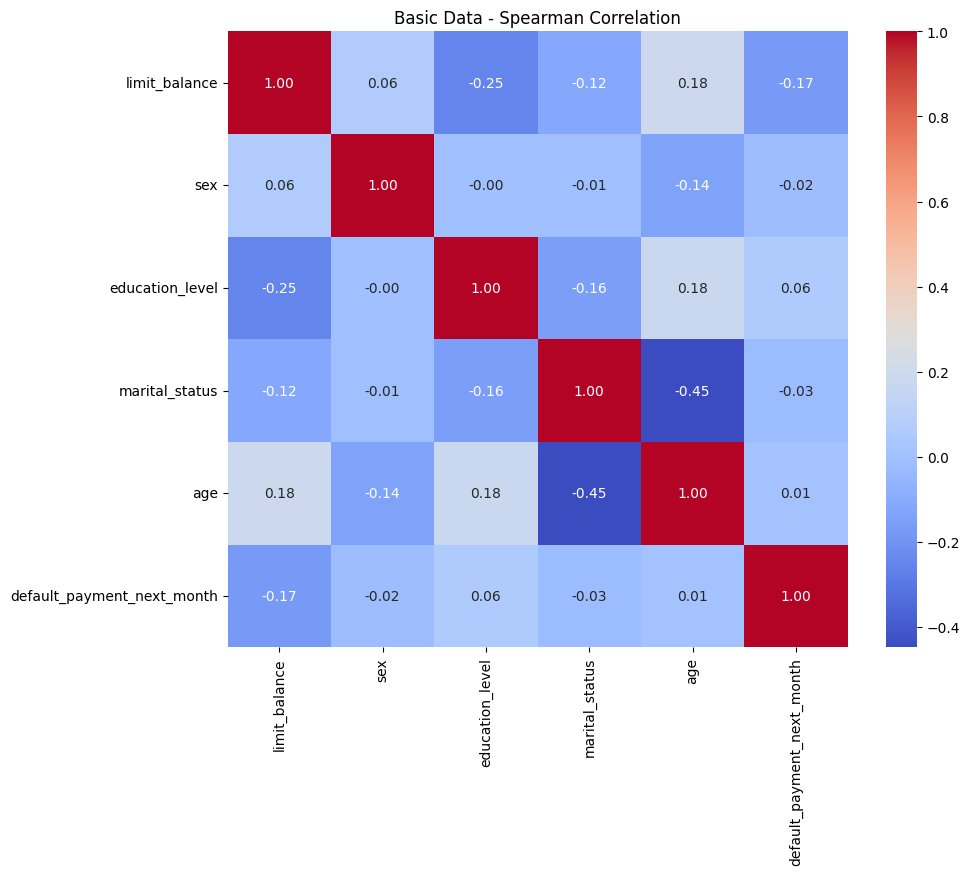

In [10]:
data = df[['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'default_payment_next_month']]
plt.figure(figsize=(10,8))
# Menggunakan metode spearman dikarenakan asumsi data masih memiliki outliers.
sns.heatmap(data.corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Basic Data - Spearman Correlation")

plt.show()

Meskipun menunjukkan bahwa semua kolom informasi dasar pengguna memiliki korelasi dengan pembayaran bulan depan, namun kebanyakan mendekati nilai 0%. Maka jika saya menentukan batas korelasi di atas 10%, maka dari hasil visualisasi di atas hanya kolom `limit_balance` yang memiliki korelasi dengan kolom `default_payment_next_month`.

### Status Repayment Correlation

Menghitung korelasi Spearman kolom-kolom repayment terhadap kolom pembayaran bulan depan `default_payment_next_month`.

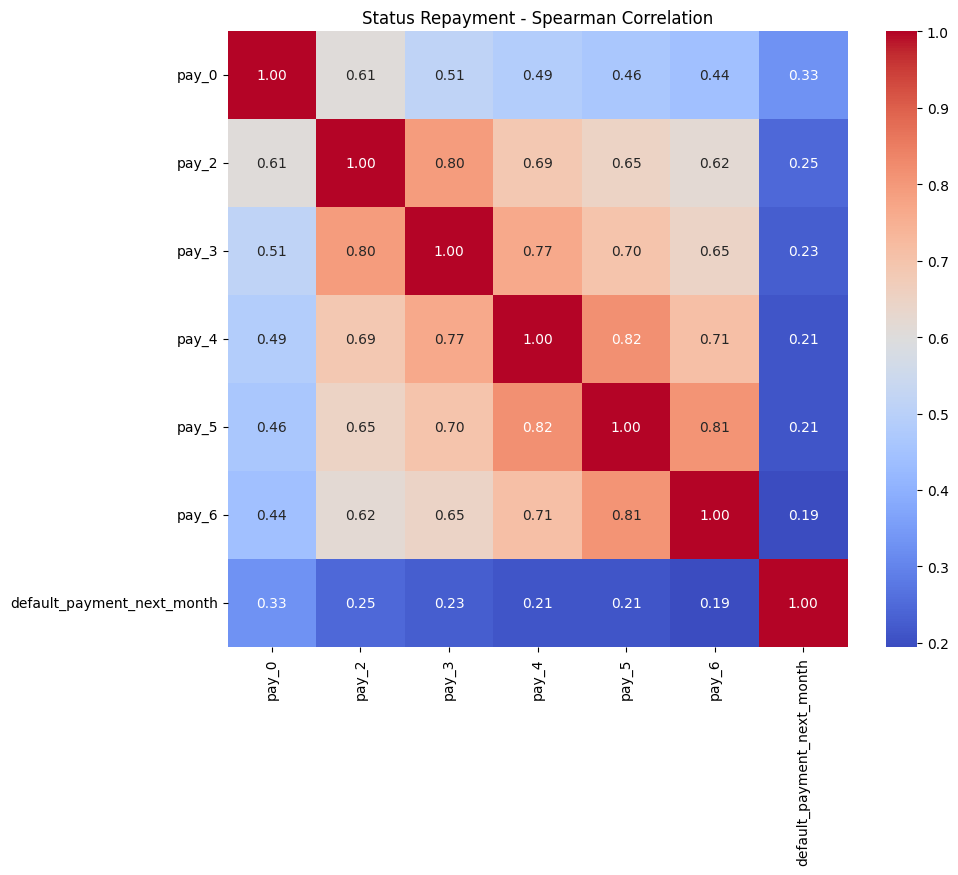

In [11]:
pay = df[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default_payment_next_month']]
plt.figure(figsize=(10,8))
sns.heatmap(pay.corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Status Repayment - Spearman Correlation")

plt.show()

Dapat disimpulkan dari data di atas bahwa semua kolom **status repayment** memiliki korelasi dengan kolom pembayaran bulan depan `default_payment_next_month`.

### Bill Statement Correlation

Melakukan analisa korelasi Spearman pada kolom-kolom bill statement terhadap kolom pembayaran bulan depan `default_payment_next_month`.

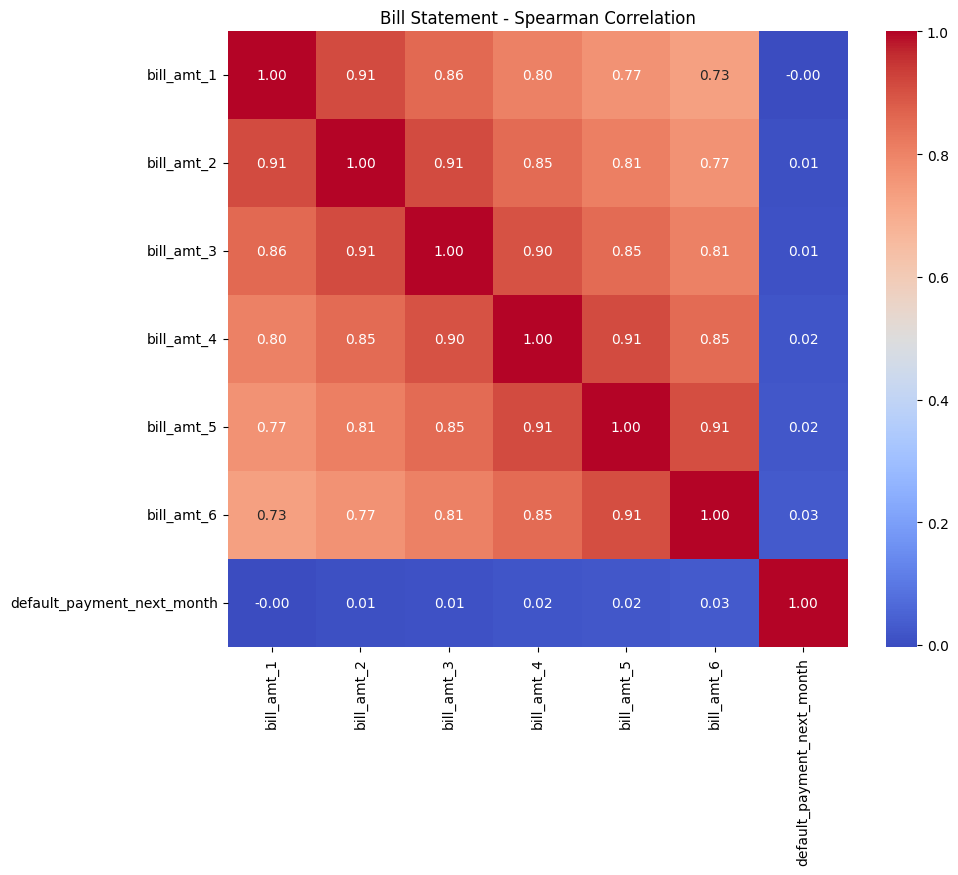

In [12]:
bill = df[['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'default_payment_next_month']]
plt.figure(figsize=(10,8))
sns.heatmap(bill.corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Bill Statement - Spearman Correlation")

plt.show()

Hasil analisa korelasi kolom-kolom bill statement menunjukkan korelasi yang sangat kecil (mendekati 0%) terhadap `default_payment_next_month`.

### Previous Payment Correlation

Uji korelasi Spearman pada kolom-kolom pembayaran sebelumnya terhadap kolom pembayaran bulan depan `default_payment_next_month`.

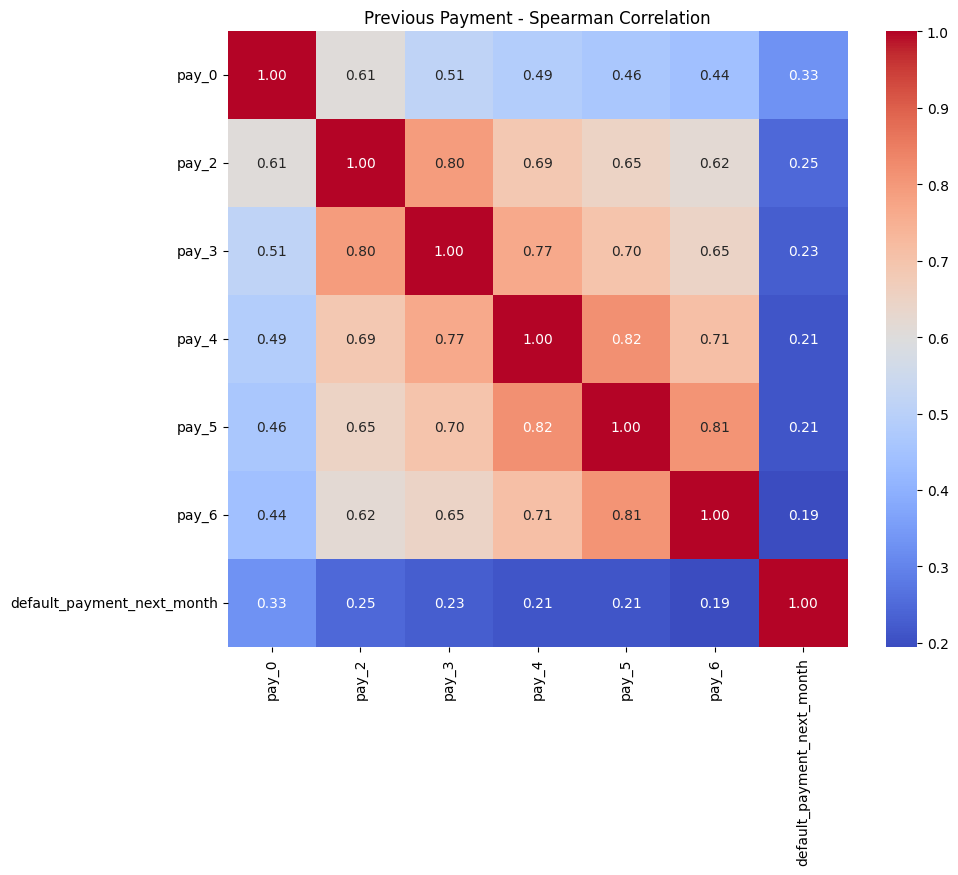

In [13]:
payamt = df[['pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment_next_month']]
plt.figure(figsize=(10,8))
sns.heatmap(pay.corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Previous Payment - Spearman Correlation")

plt.show()

Terlihat dari hasil uji korelasi Spearman pada kolom-kolom pembayaran sebelumnya, seluruh kolom memiliki korelasi dengan kolom `default_payment_next_month`.

# Feature Engineering

## Feature Selection

Dari hasil uji korelasi pada tahap EDA, didapatkan bahwa kolom `sex`, `education_level`, `marital_status`, `age`, dan kolom-kolom bill statement (`bill_amt_1`, `bill_amt_2`, `bill_amt_3`, `bill_amt_4`, `bill_amt_5`, `bill_amt_6`) memiliki korelasi yang sangat lemah (mendekati 0). Akan tetapi saya akan tetap memasukkan kolom-kolom tersebut untuk dilakukan pemodelan.

## Data Inference Saving

In [14]:
# Mengambil sample data yang nanti akan digunakan pada tahap inference.
data_inf = df.sample(28, random_state=3)

# Menghapus index sample data dari dataset utama.
df = df.drop(data_inf.index)

# Menunjukkan sample data yang akan digunakan pada tahap inference.
data_inf.head()

limit_balance  sex  education_level  marital_status   age  pay_0  pay_2  \
499         50000.0    1                2               2  32.0    0.0    0.0   
1031        30000.0    2                2               2  35.0    2.0    2.0   
1546       360000.0    1                1               2  32.0   -1.0   -1.0   
1496       100000.0    2                1               2  30.0    0.0    0.0   
916        170000.0    2                2               2  24.0    0.0    0.0   

      pay_3  pay_4  pay_5  pay_6  bill_amt_1  bill_amt_2  bill_amt_3  \
499     0.0    0.0    0.0    0.0     48536.0     41045.0     41532.0   
1031    0.0    0.0    0.0    0.0     25368.0     24662.0     26001.0   
1546   -1.0   -1.0    0.0    0.0        27.0       185.0         0.0   
1496   -2.0   -1.0    0.0    0.0     41150.0         0.0         0.0   
916     0.0    0.0    0.0    0.0     64142.0     54347.0     55677.0   

      bill_amt_4  bill_amt_5  bill_amt_6  pay_amt_1  pay_amt_2  pay_amt_3  \
499      18646.0     19183.0     19214.0     3030.0     2124.0      646.0   
1031     27012.0     27241.0     27812.0        0.0     1739.0     1750.0   
1546       617.0       617.0         0.0      185.0        0.0      617.0   
1496     74550.0     75731.0     75975.0        0.0        0.0    74550.0   
916      59096.0     50536.0     15851.0     3000.0     3000.0     5000.0   

      pay_amt_4  pay_amt_5  pay_amt_6  default_payment_next_month  
499       828.0     1097.0      612.0                           0  
1031      975.0     1010.0     3226.0                           1  
1546        0.0        0.0        0.0                           0  
1496     3000.0     3000.0     3500.0                           0  
916     10000.0     5000.0     6000.0                           0

## Data Split

Melakukan pemisahan data antara feature (X) dan target klasifikasi (y), serta pemisahan data train dan data test. 

In [15]:
X = df.drop(['default_payment_next_month'], axis = 1)
y = df['default_payment_next_month']
X.head()

limit_balance  sex  education_level  marital_status   age  pay_0  pay_2  \
0        80000.0    1                6               1  54.0    0.0    0.0   
1       200000.0    1                4               1  49.0    0.0    0.0   
2        20000.0    2                6               2  22.0    0.0    0.0   
3       260000.0    2                4               2  33.0    0.0    0.0   
4       150000.0    1                4               2  32.0    0.0    0.0   

   pay_3  pay_4  pay_5  pay_6  bill_amt_1  bill_amt_2  bill_amt_3  bill_amt_4  \
0    0.0    0.0    0.0    0.0     61454.0     61808.0     62290.0     29296.0   
1    0.0    0.0    0.0    0.0     49221.0     49599.0     50942.0     50146.0   
2    0.0    0.0    0.0    0.0     19568.0     19420.0     15535.0      1434.0   
3    0.0    0.0    0.0    0.0     18457.0     22815.0     27086.0     27821.0   
4    0.0   -1.0    0.0    0.0    159919.0     68686.0    161192.0    150464.0   

   bill_amt_5  bill_amt_6  pay_amt_1  pay_amt_2  pay_amt_3  pay_amt_4  \
0     26210.0     17643.0     2545.0     2208.0     1336.0     2232.0   
1     50235.0     48984.0     1689.0     2164.0     2500.0     3480.0   
2       500.0         0.0     4641.0     1019.0      900.0        0.0   
3     30767.0     29890.0     5000.0     5000.0     1137.0     5000.0   
4    143375.0    146411.0     4019.0   146896.0   157436.0     4600.0   

   pay_amt_5  pay_amt_6  
0      542.0      348.0  
1     2500.0     3000.0  
2     1500.0        0.0  
3     1085.0     5000.0  
4     4709.0     5600.0

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 28)

print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (2055, 23)
Test Size:  (881, 23)


Data train dan data test sudah berhasil terpisahkan terhadap masing-masing feature dan target klasifikasi-nya.

## Outliers Handling

### Skewness

Melakukan pengecekan nilai skewness pada tiap-tiap kolom data train (X_train).

In [17]:
kolom = list(X_train.columns)

list= []

for col in kolom:
  list.append([col, X_train[col].skew()])

pd.DataFrame(columns=['Kolom', 'Skewness'], data= list)

Kolom   Skewness
0     limit_balance   1.047687
1               sex  -0.458628
2   education_level   0.812951
3    marital_status  -0.021846
4               age   0.741800
5             pay_0   0.894320
6             pay_2   0.816794
7             pay_3   0.894227
8             pay_4   1.088285
9             pay_5   1.043413
10            pay_6   0.976049
11       bill_amt_1   2.533318
12       bill_amt_2   2.454935
13       bill_amt_3   2.461382
14       bill_amt_4   2.407399
15       bill_amt_5   2.395429
16       bill_amt_6   2.408168
17        pay_amt_1  10.606102
18        pay_amt_2   7.322532
19        pay_amt_3   8.403017
20        pay_amt_4   8.799217
21        pay_amt_5  11.860252
22        pay_amt_6  10.475013

In [18]:
X_train.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6'],
      dtype='object')

Terlihat dari hasil analisa skewness, kolom-kolom `'limit_balance', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'` memiliki skewness moderat (|0,5| < skewness <= |1|). Pada kolom-kolom bill statement `'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6'` dan kolom-kolom previous payment `'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5','pay_amt_6'` memiliki extreme skewness (skewness > |1|).

### Capping

Saya **hanya** melakukan capping pada data `X_train` yang memiliki nilai skewness extreme pada kolom-kolom *bill statement* dan kolom-kolom *previous payment*, terlebih pada kolom-kolom **repayment status** ('pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6') saya asumsikan sebagai kolom hasil encoding.

In [19]:
# Melakukan capping dengan metode iqr pada kolom-kolom skewness > |1| dan menggunakan threshold = 3.
winsoriser = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=3,
                            variables=['bill_amt_1','bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
                                       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'],
                            missing_values='ignore')

# Saya hanya melakukan capping pada X_train dan tidak pada X_test, dengan alasan ingin melihat seberapa jauh model dapat menangani outliers nanti di saat melakukan data test.
X_train_capped = winsoriser.fit_transform(X_train)

print('Train Size: ', X_train.shape)
print('Train Capped Size: ', X_train_capped.shape)

Train Size:  (2055, 23)
Train Capped Size:  (2055, 23)


Dataset `X_train` telah berhasil dilakukan capping dan disimapn ke dalam fungsi `X_train_capped`.

# Pipeline [Model Definition and Training]

Pada tahap ini saya mencoba untuk melakukan proses pemodelan dan pelatihan model *Machine Learning* menggunakan pipeline. Dimana metode pemodelan yang akan saya gunakan adalah `Linear Regression`, `SVM`, dan `KNN` dengan melakukan **hyperparameter**. Serta pada tahap normalisasi (scaling) saya menggunakan metode `MinMaxScaler` dengan asumsi data masih terdapat outliers.

## Logistic Regression [Pipeline]

In [20]:
# Membuat pipeline dengan normalisasi MinMaxScaler dan pemodelan LogisticRegression.
pipe_lr = make_pipeline(MinMaxScaler(), LogisticRegression())

# Menentukan parameter hyperparameter pada LogisticRegression.
lr_param_grid = {
    'logisticregression__C': [0.1, 0.5, 1.0, 3.0, 5.0],
    'logisticregression__solver': ['liblinear', 'saga'],
    'logisticregression__max_iter': [100, 200, 300]
}

# Mencari parameter LogisticRegression terbaik menggunakan metode GridSearch.
grid_search_lr = GridSearchCV(pipe_lr, lr_param_grid, cv=5)

# Melakukan fit pemodelan pada data train.
grid_lr_fit = grid_search_lr.fit(X_train, y_train)
grid_lr_fit

/opt/miniconda3/envs/kernelenv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/kernelenv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.1, 0.5, 1.0, 3.0, 5.0],
                         'logisticregression__max_iter': [100, 200, 300],
                         'logisticregression__solver': ['liblinear', 'saga']})

## SVM [Pipeline]

In [21]:
# Membuat pipeline dengan normalisasi MinMaxScaler dan pemodelan SVC.
pipe_svm = make_pipeline(MinMaxScaler(), SVC())

# Menentukan hyperparameter.
svm_param_grid = {
    'svc__C': [0.1, 0.5, 1.0, 3.0, 5.0],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__gamma': ['scale', 'auto']
}

# Mencari parameter terbaik menggunakan metode GridSearch.
grid_search_svm = GridSearchCV(pipe_svm, svm_param_grid, cv=5)

# Melakukan fit pemodelan pada data train.
grid_svm_fit = grid_search_svm.fit(X_train, y_train)
grid_svm_fit

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 0.5, 1.0, 3.0, 5.0],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

## KNN [Pipeline]

In [22]:
# Membuat pipeline dengan normalisasi MinMaxScaler dan pemodelan KNN.
pipe_knn = make_pipeline(MinMaxScaler(), KNeighborsClassifier())

# Menentukan hyperparameter.
knn_param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 9],
    'kneighborsclassifier__weights': ['uniform', 'distance']
}

# Mencari parameter terbaik menggunakan metode GridSearch.
grid_search_knn = GridSearchCV(pipe_knn, knn_param_grid, cv=5)

# Melakukan fit pemodelan pada data train.
grid_knn_fit = grid_search_knn.fit(X_train, y_train)
grid_knn_fit

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': [3, 5, 7, 9],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']})

Data train telah berhasil dilakukan pelatihan pemodelan `Logistic Regression`, `SVM`, dan `KNN`.

# Best Model Evaluation

Pada proses ini akan dilakukan evaluasi pemodelan untuk melihat parameter yang terbaik pada tiap pemodelan.

## Logistic Regression

In [23]:
print('Logistic Regression - Train Set Score : ', grid_lr_fit.score(X_train, y_train))
print('Logistic Regression - Test Set Score : ', grid_search_lr.score(X_test, y_test))

Logistic Regression - Train Set Score :  0.8238442822384429
Logistic Regression - Test Set Score :  0.8183881952326901


In [24]:
# Melakukan cross validation.
cross_val_scores = cross_val_score(grid_search_lr.best_estimator_, X_train, y_train, cv=5)
print('Cross-validation scores:', cross_val_scores)
print('Mean cross-validation score:', cross_val_scores.mean())

Cross-validation scores: [0.83941606 0.81265207 0.81995134 0.81995134 0.81265207]
Mean cross-validation score: 0.8209245742092458


Dari hasil analisa score hasil pemodelan `Logistic Regression` didapatkan selisih yang kecil (sekitar 0,3%) antara pemodelan pada data train dan data test, maka dapat disimpulkan sedikit mengalami overfitting.

In [25]:
# Menampilkan parameter terbaik dari hasil pengujian.
best_lr = grid_search_lr.best_params_
print(best_lr)
print('\n')

best_pipe_lr = grid_search_lr.best_estimator_
print(best_pipe_lr)

{'logisticregression__C': 3.0, 'logisticregression__max_iter': 100, 'logisticregression__solver': 'liblinear'}


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(C=3.0, solver='liblinear'))])


Parameter terbaik pada metode pemodelan `Logistic Regression` adalah:
* C = 5
* itter = 100
* solver = liblinear

In [26]:
print(classification_report(y_test, best_pipe_lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       700
           1       0.65      0.25      0.37       181

    accuracy                           0.82       881
   macro avg       0.74      0.61      0.63       881
weighted avg       0.80      0.82      0.79       881



Secara keseluruhan hasil f1-score di atas pada metode Logistic Regression menunjukkan data klasifikasi yang tidak seimbang, 89% pada klasifikasi 0 dan 37% pada klasifikasi 1. Namun secara akurasi pemodelan ini memiliki akurasi yang cukup baik yaitu 82%. 

## SVM

In [27]:
print('SVM - Train Set Score : ', grid_svm_fit.score(X_train, y_train))
print('SVM - Test Set Score : ', grid_search_svm.score(X_test, y_test))

SVM - Train Set Score :  0.8496350364963504
SVM - Test Set Score :  0.8331441543700341


In [28]:
# Melakukan cross validation.
cross_val_scores2 = cross_val_score(grid_search_svm.best_estimator_, X_train, y_train, cv=5)
print('Cross-validation scores:', cross_val_scores2)
print('Mean cross-validation score:', cross_val_scores2.mean())

Cross-validation scores: [0.84428224 0.81265207 0.8296837  0.82725061 0.83454988]
Mean cross-validation score: 0.8296836982968369


Dari hasil analisa score hasil pemodelan `SVM` didapatkan selisih sekitar 1,6% antara pemodelan pada data train dan data test, maka dapat disimpulkan sedikit mengalami overfitting.

In [29]:
best_svm = grid_search_svm.best_params_
print(best_svm)
print('\n')

best_pipe_svm = grid_search_svm.best_estimator_
print(best_pipe_svm)

{'svc__C': 5.0, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('svc', SVC(C=5.0))])


Parameter terbaik pada metode pemodelan `SVM` adalah:
* C = 5
* gamma = scale
* kernel = rbf

In [30]:
print(classification_report(y_test, best_pipe_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       700
           1       0.68      0.35      0.46       181

    accuracy                           0.83       881
   macro avg       0.77      0.65      0.68       881
weighted avg       0.82      0.83      0.81       881



Secara keseluruhan hasil f1-score di atas pada metode SVM menunjukkan data klasifikasi yang tidak seimbang, 90% pada klasifikasi 0 dan 46% pada klasifikasi 1. Namun secara akurasi pemodelan ini memiliki akurasi yang cukup baik yaitu 83%. 

## KNN

In [31]:
print('KNN - Train Set Score : ', grid_knn_fit.score(X_train, y_train))
print('KNN - Test Set Score : ', grid_search_knn.score(X_test, y_test))

KNN - Train Set Score :  0.8291970802919708
KNN - Test Set Score :  0.8138479001135074


In [34]:
# Melakukan cross validation.
cross_val_scores3 = cross_val_score(grid_search_svm.best_estimator_, X_train, y_train, cv=5)
print('Cross-validation scores:', cross_val_scores3)
print('Mean cross-validation score:', cross_val_scores3.mean())

Cross-validation scores: [0.84428224 0.81265207 0.8296837  0.82725061 0.83454988]
Mean cross-validation score: 0.8296836982968369


Dari hasil analisa score hasil pemodelan `KNN` didapatkan selisih sekitar 1,6% antara pemodelan pada data train dan data test, maka dapat disimpulkan sedikit mengalami overfitting.

In [32]:
best_knn = grid_search_knn.best_params_
print(best_knn)
print('\n')

best_pipe_knn = grid_search_knn.best_estimator_
print(best_pipe_knn)

{'kneighborsclassifier__n_neighbors': 9, 'kneighborsclassifier__weights': 'uniform'}


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])


Parameter terbaik pada metode pemodelan `KNN` adalah:
* K = 9
* weights = uniform

In [33]:
print(classification_report(y_test, best_pipe_knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       700
           1       0.60      0.27      0.37       181

    accuracy                           0.81       881
   macro avg       0.72      0.61      0.63       881
weighted avg       0.79      0.81      0.78       881



Secara keseluruhan hasil f1-score di atas pada metode KNN menunjukkan data klasifikasi yang tidak seimbang, 89% pada klasifikasi 0 dan 37% pada klasifikasi 1. Namun secara akurasi pemodelan ini memiliki akurasi yang cukup baik yaitu 81%. 

# Model Saving

Melakukan penyimpanan metode pemodelan dengan modul pickle.

In [35]:
pickle.dump(best_pipe_lr, open('best_model_lr.pkl', 'wb'))
pickle.dump(best_pipe_svm, open('best_model_svm.pkl', 'wb'))
pickle.dump(best_pipe_knn, open('best_model_knn.pkl', 'wb'))

# Model Inference

Melakukan percobaan pemodelan terhadap data inference.

In [36]:
# Model loading.
best_pipe_lr = pickle.load(open('best_model_lr.pkl', 'rb'))
best_pipe_svm = pickle.load(open('best_model_svm.pkl', 'rb'))
best_pipe_knn = pickle.load(open('best_model_knn.pkl', 'rb'))

In [37]:
# Melakukan drop target klasifikasi.
data_inf_X = data_inf.drop(['default_payment_next_month'], axis = 1)

# Melakukan prediksi tiap-tiap model terhadap data inference.
pred_lr = best_pipe_lr.predict(data_inf_X)
pred_svm = best_pipe_svm.predict(data_inf_X)
pred_knn = best_pipe_knn.predict(data_inf_X)

print("Logistic Regression Predictions:", pred_lr)
print("SVM Predictions:", pred_svm)
print("KNN Predictions:", pred_knn)

Logistic Regression Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
SVM Predictions: [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
KNN Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1]


Data inference (28 baris) telah berhasil terklasifikasi, memang terlihat lebih banyak klasifikasi 0 (tidak seimbang), sesuai hasil dari evaluasi model sebelumnya.

# Conclusion

## Conceptual Problem

1. Apakah yang dimaksud dengan coeficient pada logistic regression?

    Koefisien ($β$) pada `Logistic Regression` merupakan peranan penting dalam pemodelan, yang dimana menunjukkan korelasi antara feature dengan target pemodelan klasifikasi. 

2. Apakah fungsi parameter kernel pada SVM? Jelaskan salah satu kernel yang kalian pahami!

    Kernel merupakan salah satu hyperparameter untuk transformasi dimensi pada feature, sehingga mempermudah untuk memisahkan data guna mempermudah klasifikasi. Salah satu kernel SVM yang ada adalah rbf (Gaussian Kernel), merupakan kernel yang cocok untuk data yang kompleks dan untuk kelas yang non-linear *separable*.



3. Bagaimana cara memilih `K` yang optimal pada KNN ?

    Dengan menggunakan hyperparameter tuning pada n_neighbours metode KNN, pada hasil dari kasus ini nilai `K` yang optimal terdapat pada n_neighbours = 9.

4. Apa yang dimaksud dengan metrics-metrics berikut : `Accuracy`, `Precision`, `Recall`, `F1 Score`, dan kapan waktu yang tepat untuk menggunakannya ?

    * `Accuracy`: merupakan presentase akurasi dari hasil prediksi.
    * `Precision`: proporsi prediksi positif yang benar dari total prediksi positif
    * `Recall`: proporsi prediksi positif yang benar dari total sampel positif sebenarnya.
    * `F1 Score`: harmonik rata-rata dari precision dan recall, memberikan keseimbangan antara keduanya.

    Metric-metric ini digunakan saat evaluasi model.

## Overall

1. Hasil eksplorasi data: 
    * Jenis kelamin Perempuan lebih banyak dibandingkan Lak-laki pada dataset.
    * Distribusi umur pada dataset ada pada 21 tahun hingga 69 tahun.
    * Hanya kolom-kolom Status Repayment dan kolom-kolom Previous Payment yang memiliki korelasi kuat dengan target klasifikasi pada kolom 'default_payment_next_month'.

2. Hasil pemodelan:
    * Metode pemodelan Logistic Regression terbaik adalah dengan hyperparameter C = 5, itter = 100, dan solver = liblinear. Dan menghasilkan tingkat akurasi 82% dengan sedikit overfitting (0,3%).
    * Metode pemodelan KNN terbaik adalah dengan hyperparameter K = 9 dan weights = uniform. Menghasilan tingkat akurasi 81% dengan sedikit overfitting (1,6%).
    * Metode pemodelan SVM terbaik adalah dengan hyperparameter C = 5, gamma = scale, dan kernel = rbf. Menghasilkan tingkat akurasi 83% dengan sedikit overfitting (1,6%).
